%load tex/macros.tex  

In [1]:
import sys
sys.path.append("../ferromtm/ferromtm")
from ferromtm.visualization.postpro2D import *
from aotomat.tools.plottools import *
%matplotlib inline
sns.set_context("notebook", font_scale=1.5, 
                rc={"lines.markersize": 12, "lines.linewidth": 2.5, "axes.labelsize":20})
import matplotlib as mpl
colorlist = ["#A64C41", "#8d8d8d", "#416cad", "#46995d", "#c27442", "#d9cf4a", "#875da2"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colorlist) 
from research.material.example_bst import *

<Figure size 432x288 with 0 Axes>


$
\newcommand{\B}[1]{\boldsymbol{#1}}
\newcommand{\tens}[1]{\B{#1}}
\newcommand{\re}{\mathrm{Re}}
\newcommand{\im}{\mathrm{Im}}
\newcommand{\grad}{\B{\mathrm{\nabla}}}
\renewcommand{\div}{\B{\mathrm{\nabla\cdotp}}}
\newcommand{\ddroit}{\mathrm{d}}
\newcommand{\epsf}{\varepsilon^{\rm f}}
\newcommand{\epsftens}{\tens{\varepsilon}^{\rm f}}
\newcommand{\epstens}{\tens{\varepsilon}}
\newcommand{\epsd}{\varepsilon^{\rm d}}
\newcommand{\epsvac}{\varepsilon_{0}}
\newcommand{\epshom}{\tilde{\epstens}}
\newcommand{\epshom}{\tilde{\epstens}}
$


# Citations

References are nice [@Tagantsev2018] and [@BOUCHITTE2004377]



# Parameters for ferroelectrics

- tunability: $$n = \frac{\varepsilon(0)}{\varepsilon(E)}$$


- loss tangent: $$\tan\delta(E)$$

- commutation quality factor: $$K = \frac{(n -1)^2}{n\, \tan\delta(0)\,\tan\delta(E)}$$

# Permittivity model
### Landau potential
$$F(P,E) = F_0 +  a P^2/2 + b P^4/4 + cP^6/6 - EP$$
where $E$ is the applied electric field and $P$ is the polarization 


### Equation of state 
$$\frac{\partial F (P, E)}{\partial P}   = a P_0 + b P_0^3 + c P_0^5 - E = 0$$
$P_0$ is the equilibrium polarization


[@Zhou2008]

# Permittivity model
\begin{equation}
  \epsf(E) = \left[\epsvac \frac{\partial^2 F (P, E)}{\partial P^2} \right]^{-1} = \frac{\epsf(0)}{1 + \beta P_0^2 + \gamma P_0^4},
  \label{eq_epsf}
\end{equation}
where $\beta = 3 b \epsvac \epsf(0) /a$ and  $\gamma = 5 c \epsvac \epsf(0) /a$.

- permittivity without bias $\epsf(0)$ was measured to be 120
- fitting parameters: $a = 0.992/\epsvac$, $b=0.086/(\epsvac^3\,E_{\rm ref}^2)$, $c=0.014/(\epsvac^5\,E_{\rm ref}^4)$, $E_{\rm ref}=1$ kV/mm.

### Dieletric tensor
\begin{equation}
  \epsftens (\B E) =
\begin{pmatrix}
\epsf_{xx}(E_x) & 0 & 0 \\
0 & \epsf_{yy}(E_y) & 0 \\
0 & 0 & \epsf_{zz}(E_z)
\end{pmatrix}
\label{eq_epsftens}
\end{equation}


# Measurements and fit

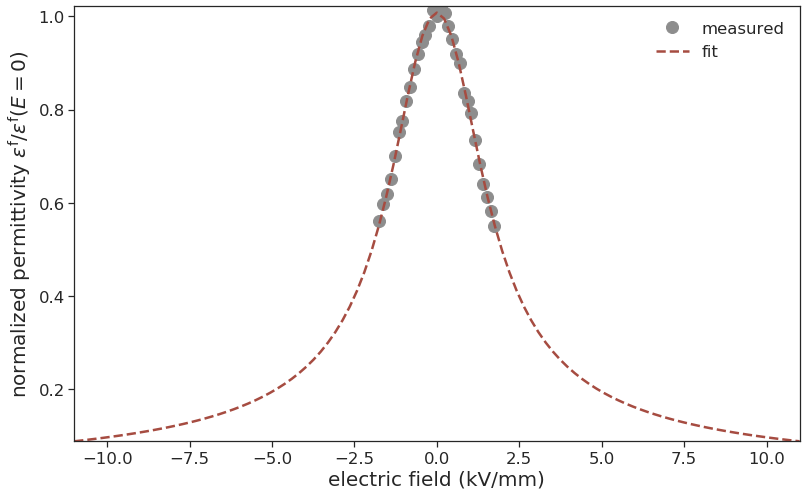

In [2]:
sample = 4
E_exp, eps_norm_exp = get_sample(sample)
f_eps_fit = retrieve_params(sample=sample)
E_fit = np.linspace(-11, 11, 101)
eps_fit = f_eps_fit(E_fit)


fig, ax = plt.subplots(figsize=(13,8))
ax.plot(E_exp, eps_norm_exp.real, "o",  label="measured", color = colorlist[1])
ax.plot(E_fit, eps_fit.real, "--", color=colorlist[0], label="fit")
ax.set_ylabel(r"normalized permittivity $\varepsilon^{\rm f}/\varepsilon^{\rm f}(E=0)$")
ax.set_xlabel("electric field (kV/mm)")
_ = ax.legend()


# Effective parameters

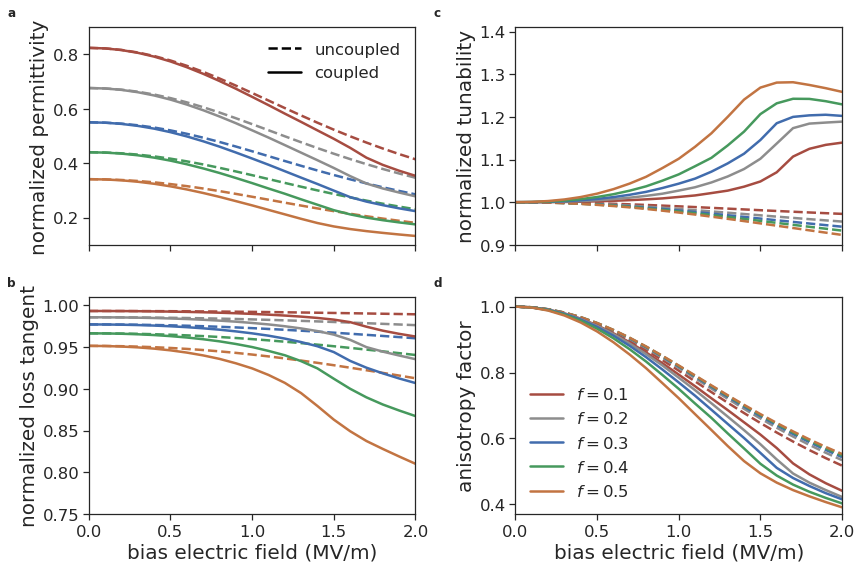

In [3]:


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
plot_eff_par(fig, ax)
plt.tight_layout()